In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("enso_index.csv")
df

,year,january,february,march,april,may,june,july,august,september,october,november,december,avg
0,1958,1.54,1.40,0.99,0.31,0.32,0.30,0.04,0.24,-0.31,-0.03,0.05,0.30,0.0675
1,1959,0.43,0.50,0.26,0.27,-0.01,-0.33,-0.28,-0.41,-0.53,0.11,-0.17,-0.05,-0.3875
2,1960,0.02,-0.24,-0.08,0.01,0.05,-0.20,-0.25,0.00,0.03,-0.07,-0.38,0.02,-0.1050
3,1961,-0.15,0.04,-0.10,0.13,-0.01,0.10,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29,-0.2475
4,1962,-0.25,-0.16,-0.41,-0.32,-0.42,-0.22,-0.30,-0.13,-0.56,-0.33,-0.43,-0.49,-0.3025
5,1963,-0.32,-0.26,-0.06,-0.06,0.00,0.12,0.72,0.90,0.65,0.84,0.75,1.05,0.5975
6,1964,0.76,0.55,-0.16,-0.53,-0.74,-0.88,-0.65,-0.76,-0.93,-1.00,-1.10,-1.07,-0.8050
7,1965,-0.57,-0.36,-0.34,-0.09,0.19,0.45,0.81,1.25,1.26,1.61,1.54,1.45,0.9425
8,1966,1.13,0.83,0.83,0.54,-0.06,0.14,0.23,-0.10,-0.05,-0.05,-0.37,-0.26,0.0550
9,1967,-0.55,-0.56,-0.47,-0.53,-0.24,-0.12,-0.10,-0.31,-0.59,-0.38,-0.34,-0.35,-0.2800


In [3]:
df_month = pd.read_csv("mutual_corr.csv")
df_month

,August_3,May_3,March,November_3,October_4,February,November_7,February_4,March_8,February_5,...,July,October_2,July_3,January_5,October_6,October_9,June,April_2,January_3,September
0,0.114184,0.033686,-0.655145,0.095877,-0.223095,0.673055,0.331349,0.547221,0.017588,0.233200,...,0.473331,0.484663,0.379142,-0.071797,0.976740,0.224976,0.631570,0.401723,-0.569366,-0.869283
1,0.114184,-0.016299,-0.698491,0.095877,-0.223095,0.363829,0.331349,-0.167370,-0.324943,0.398345,...,0.473331,0.484663,0.379142,0.075582,0.976740,0.224976,0.631570,-0.053400,-0.429438,-0.869283
2,-0.170711,-0.463674,-0.668487,0.013414,-0.185702,0.252059,0.493727,0.520628,-0.189223,0.528776,...,0.484148,0.180338,0.569482,0.354383,1.125154,-0.060460,0.010084,-0.086940,-1.007866,-1.421509
3,-0.281879,-0.300338,-0.598952,-0.097387,0.424563,0.305557,0.344451,-0.019189,0.054652,0.453009,...,0.782435,0.187333,0.402957,0.182730,0.661622,0.151389,0.090262,-0.127494,-0.663070,-0.543401
4,0.013463,-0.444215,-0.678790,-0.468578,0.006136,0.156514,0.358842,0.738421,-0.252381,0.454515,...,0.679631,0.673818,0.504770,0.183832,0.724063,0.193413,-0.050781,-0.199784,-0.354893,-0.793926
5,0.009911,-0.054209,-0.532310,-0.184335,0.059998,-0.096582,0.722699,0.257332,-0.363866,0.813505,...,1.222721,0.467154,0.652537,0.389170,0.824418,-0.041658,-0.318160,0.084900,-0.316768,-0.997743
6,-0.102361,-0.288842,-0.695664,-0.100364,0.228933,0.058638,0.265362,0.134009,-0.179758,0.184133,...,0.413756,0.342577,0.715746,0.309231,0.710084,-0.138219,-0.015531,-0.523128,-0.495102,-0.374235
7,-0.349440,-0.170438,-0.579220,0.095780,0.044146,0.333448,0.388292,-0.126125,-0.054621,0.128382,...,0.783924,0.389203,0.947821,0.243655,0.451065,0.298431,-0.648905,-0.002900,-0.494805,-1.437717
8,0.125238,-0.436033,-0.656381,0.105569,-0.396204,0.781802,0.487561,0.187376,-0.106269,0.147230,...,0.615240,0.504020,0.755670,0.607805,1.111828,0.298310,0.010518,0.348856,-1.111371,-1.066644
9,-0.160472,-0.333610,-0.630780,-0.336637,0.142159,0.198319,0.394522,-0.158458,-0.146203,0.440733,...,0.433071,0.575069,0.835234,0.189033,0.849868,0.192060,-0.080473,-0.299882,-0.760174,-0.891072


In [4]:
scaler = StandardScaler()

In [5]:
x_train = df_month.iloc[:42, :10]
x_train = scaler.fit_transform(x_train)
x_train

array([[ 6.07610235e-01,  6.18174203e-01,  1.06543437e+00,
         9.50027360e-01, -1.33383573e-01,  2.04035884e+00,
        -2.97261461e-01,  1.12480149e+00,  7.23663348e-01,
        -7.88168260e-02],
       [ 6.07610235e-01,  3.60214219e-01,  7.98366002e-01,
         9.50027360e-01, -1.33383573e-01,  3.59872097e-01,
        -2.97261461e-01, -1.48934508e+00, -1.40347377e+00,
         8.48783102e-01],
       [-1.04046523e+00, -1.94857237e+00,  9.83231989e-01,
         6.16238906e-01,  2.23684348e-02, -2.47537863e-01,
         7.18805089e-01,  1.02751903e+00, -5.60647936e-01,
         1.58140399e+00],
       [-1.68355407e+00, -1.10563495e+00,  1.41166132e+00,
         1.67742752e-01,  2.56430251e+00,  4.31956348e-02,
        -2.15275901e-01, -9.47262646e-01,  9.53831540e-01,
         1.15582723e+00],
       [ 2.49574419e-02, -1.84814799e+00,  9.19749651e-01,
        -1.33475305e+00,  8.21428765e-01, -7.66777758e-01,
        -1.25222643e-01,  1.82425987e+00, -9.52862575e-01,
         1.

In [6]:
y_train = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_tr= df.iloc[:42][i]
    y_train.append(y_tr)
    

In [7]:
y_train

[0     0.0675
 1    -0.3875
 2    -0.1050
 3    -0.2475
 4    -0.3025
 5     0.5975
 6    -0.8050
 7     0.9425
 8     0.0550
 9    -0.2800
 10    0.2200
 11    0.3375
 12   -0.7525
 13   -0.7050
 14    0.9950
 15   -1.1525
 16   -0.5050
 17   -1.2725
 18    0.2575
 19    0.3750
 20   -0.5375
 21    0.1325
 22    0.0100
 23   -0.2075
 24    0.9700
 25   -0.0300
 26   -0.5125
 27   -0.6075
 28    0.2275
 29    1.3975
 30   -1.4425
 31   -0.5175
 32    0.1100
 33    0.4800
 34    0.1275
 35    0.3475
 36    0.3375
 37   -0.2100
 38   -0.2250
 39    1.6975
 40   -0.6925
 41   -0.9025
 Name: avg, dtype: float64,
 0     0.30
 1    -0.33
 2    -0.20
 3     0.10
 4    -0.22
 5     0.12
 6    -0.88
 7     0.45
 8     0.14
 9    -0.12
 10    0.19
 11    0.26
 12   -0.30
 13   -0.78
 14    0.66
 15   -0.86
 16   -0.70
 17   -1.25
 18    0.00
 19    0.36
 20   -0.45
 21    0.04
 22    0.37
 23   -0.15
 24    0.92
 25    0.62
 26   -0.90
 27   -0.76
 28   -0.08
 29    1.24
 30   -1.46
 31   -0.64


In [8]:
x_test = df_month.iloc[43:, :10]
x_test = scaler.fit_transform(x_test)
x_test

array([[-0.38808819, -0.01166501, -1.34732728,  1.64234451,  0.66993541,
        -0.39395094,  0.99204064, -0.29318147, -1.47844835,  0.99354782],
       [ 1.05079715,  1.18829611,  0.2644326 ,  0.15907934, -0.05418936,
         0.18018119, -0.61855064,  1.1853859 ,  0.37717918, -0.4053082 ],
       [ 1.34491522, -0.03826249,  0.17402926,  0.54750453, -1.49401308,
         0.06482449,  1.01055039,  1.06573623,  0.99723865, -0.13595184],
       [-0.7969692 ,  0.79739778,  0.25468795, -1.67520777, -0.03907311,
         0.2433053 ,  0.93102586,  0.15242815,  0.01023223, -0.81951597],
       [ 0.31523474, -0.45629377,  0.52158771,  0.48709358, -0.7320838 ,
        -1.82306298,  1.3252974 ,  1.57185546,  0.93998914,  0.47187803],
       [ 1.47750008, -0.27325677, -0.68989731, -0.2959327 ,  0.81030233,
        -0.52614861, -0.66540571,  0.62718797, -2.01380868,  0.05690405],
       [-0.96205135, -0.41595585, -0.58712017, -1.57474049,  1.74247461,
         2.2652909 , -1.07994662,  0.23914238

In [9]:
y_test = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_ts= df.iloc[43:][i] 
    y_test.append(y_ts)

In [10]:
y_test

[43   -0.1125
 44    0.6925
 45    0.0375
 46    0.4700
 47    0.0225
 48    0.2800
 49   -0.5350
 50   -0.2000
 51    0.6200
 52   -1.1000
 53   -0.4750
 54    0.4200
 55   -0.2475
 56    0.2800
 57    1.6800
 58   -0.2825
 Name: avg, dtype: float64,
 43   -0.11
 44    0.68
 45   -0.19
 46    0.14
 47    0.22
 48    0.09
 49   -0.16
 50   -0.44
 51    0.49
 52   -0.62
 53   -0.25
 54    0.14
 55   -0.33
 56    0.48
 57    1.28
 58    0.06
 Name: june, dtype: float64,
 43    0.01
 44    0.57
 45    0.14
 46    0.41
 47   -0.01
 48    0.03
 49   -0.37
 50   -0.04
 51    0.69
 52   -0.89
 53   -0.23
 54    0.44
 55   -0.28
 56    0.13
 57    1.56
 58   -0.25
 Name: july, dtype: float64,
 43   -0.07
 44    0.70
 45    0.05
 46    0.66
 47   -0.04
 48    0.37
 49   -0.57
 50   -0.04
 51    0.62
 52   -1.33
 53   -0.66
 54    0.66
 55   -0.29
 56    0.14
 57    1.87
 58   -0.48
 Name: august, dtype: float64,
 43   -0.28
 44    0.82
 45    0.15
 46    0.67
 47   -0.08
 48    0.63
 49   -1.04

# Bagging Regressor:

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

def perform_grid_search(x_train, y_train, x_test):
    param_grid = {
        'base_estimator__max_depth': range(1, 5),
        'n_estimators': range(1, 51)
    }

    # Create the BaggingRegressor with DecisionTreeRegressor as the base estimator
    bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(bagging_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_max_depth = best_params['base_estimator__max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")

    # Use the best parameters to train a BaggingRegressor and make predictions
    regressor = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=best_max_depth),
        n_estimators=best_n_estimators,
        oob_score=True,
        random_state=0)
    
    regressor.fit(x_train, y_train)
    score = regressor.score(x_train, y_train)
    y_pred = regressor.predict(x_test)

    return best_params, best_score, score, y_pred


In [12]:

y_pred_list = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list.append(y_pred)



Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 2}
Best Score: 0.3619677982990725
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 5}
Best Score: 0.14901602818076887
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 37}
Best Score: 0.08702123284163221
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 49}
Best Score: 0.11147402003749313
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 4}
Best Score: 0.30354552669376467


In [13]:
y_pred_list

[array([-0.10258779,  0.511125  , -0.86263587,  0.20400641, -0.325625  ,
        -0.57588587, -0.10258779, -0.45326087,  0.9825    ,  0.15125   ,
        -0.45326087, -0.10258779, -0.45326087, -0.10258779,  0.9825    ,
        -0.26929167]),
 array([-0.23068294, -0.01011111, -0.36918921,  0.04069968, -0.13712698,
        -0.60234961, -0.05123683, -0.23068294,  0.41361905, -0.21230199,
        -0.30093016,  0.00247746, -0.12057016,  0.07181079,  0.53666667,
        -0.44107977]),
 array([ 0.09175833,  0.01465698, -0.54057604, -0.02505079, -0.29882708,
        -0.47571279, -0.14837972, -0.25803445,  0.18281622, -0.03459084,
        -0.32362159, -0.17384345, -0.27357331,  0.09869174,  0.4162747 ,
        -0.27078796]),
 array([ 0.12814322, -0.16604933, -0.76998728,  0.37184353, -0.61526577,
        -0.60782973, -0.17639311, -0.31462193,  0.52617648, -0.08185276,
        -0.3548269 , -0.20855466, -0.28659997,  0.5446914 ,  0.73779198,
        -0.29265748]),
 array([ 0.23395833, -0.33825   

In [14]:
correlation_list = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list.append(corr_bag_reg_mean[0][1])

In [15]:
correlation_list

[0.5886924425912571,
 0.6859787111807369,
 0.5681078341242197,
 0.48223634839502527,
 0.07006862196820238]

In [16]:
months = ['jjas-mean','june','july','august','september']

In [17]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+uwind/10 predictors/kendall/coorelation_plots/bagging_regressor'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+uwind (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)


Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+uwind/10 predictors/kendall/coorelation_plots/bagging_regressor


In [18]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+uwind/10 predictors/kendall/comparison plots/bagging_regressor'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'slp+uwind Predicted vs Actual 10p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+uwind/10 predictors/kendall/comparison plots/bagging_regressor


# Random Forest

In [19]:


def perform_random_forest_grid_search(x_train, y_train, x_test):
    # Define the parameter grid
    param_grid = {
        'n_estimators': range(1, 51),
        'max_depth': range(1, 5),
    }

    # Create the RandomForestRegressor
    random_forest_reg = RandomForestRegressor(random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(random_forest_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Save the best values into separate variables
    best_max_depth = best_params['max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")
    print(f"Best max_depth: {best_max_depth}")
    print(f"Best n_estimators: {best_n_estimators}")

    # Use the best parameters to train a RandomForestRegressor and make predictions
    RF = RandomForestRegressor(
        n_estimators=best_n_estimators,
        max_depth=best_max_depth,
        random_state=0)

    RF.fit(x_train, y_train)
    score = RF.score(x_train, y_train)
    y_pred_rf = RF.predict(x_test)

    return best_params, best_score, score, y_pred_rf


In [20]:

y_pred_list_rf = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list_rf.append(y_pred)


Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 2}
Best Score: 0.3619677982990725
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 5}
Best Score: 0.14901602818076887
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 37}
Best Score: 0.08702123284163221
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 49}
Best Score: 0.11147402003749313
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 4}
Best Score: 0.30354552669376467


In [21]:
y_pred_list_rf

[array([-0.10258779,  0.511125  , -0.86263587,  0.20400641, -0.325625  ,
        -0.57588587, -0.10258779, -0.45326087,  0.9825    ,  0.15125   ,
        -0.45326087, -0.10258779, -0.45326087, -0.10258779,  0.9825    ,
        -0.26929167]),
 array([-0.23068294, -0.01011111, -0.36918921,  0.04069968, -0.13712698,
        -0.60234961, -0.05123683, -0.23068294,  0.41361905, -0.21230199,
        -0.30093016,  0.00247746, -0.12057016,  0.07181079,  0.53666667,
        -0.44107977]),
 array([ 0.09175833,  0.01465698, -0.54057604, -0.02505079, -0.29882708,
        -0.47571279, -0.14837972, -0.25803445,  0.18281622, -0.03459084,
        -0.32362159, -0.17384345, -0.27357331,  0.09869174,  0.4162747 ,
        -0.27078796]),
 array([ 0.12814322, -0.16604933, -0.76998728,  0.37184353, -0.61526577,
        -0.60782973, -0.17639311, -0.31462193,  0.52617648, -0.08185276,
        -0.3548269 , -0.20855466, -0.28659997,  0.5446914 ,  0.73779198,
        -0.29265748]),
 array([ 0.23395833, -0.33825   

In [22]:
correlation_list_rf = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list_rf.append(corr_bag_reg_mean[0][1])

In [23]:
correlation_list_rf

[0.5886924425912571,
 0.6859787111807369,
 0.5681078341242197,
 0.48223634839502527,
 0.07006862196820238]

In [24]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+uwind/10 predictors/kendall/coorelation_plots/randomforest'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+uwind (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'10_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook
    
print("Plots saved in:", output_directory)

Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+uwind/10 predictors/kendall/coorelation_plots/randomforest


In [25]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+uwind/10 predictors/kendall/comparison plots/randomforest'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list_rf[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'slp+uwind Predicted vs Actual 10p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+uwind/10 predictors/kendall/comparison plots/randomforest


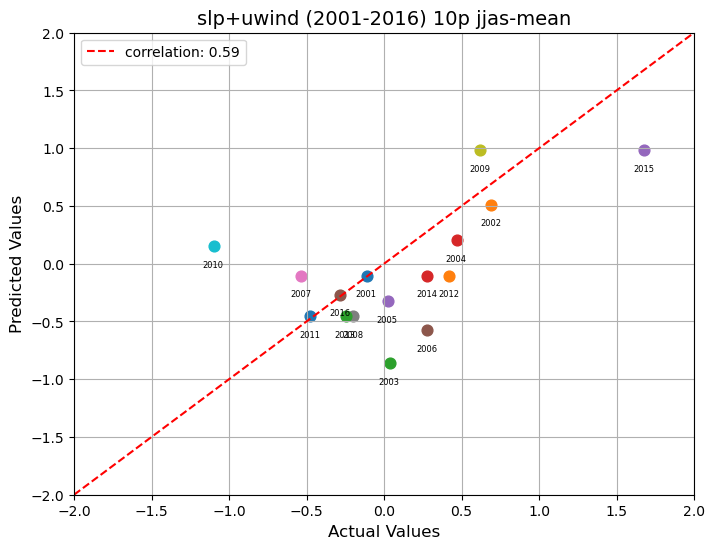

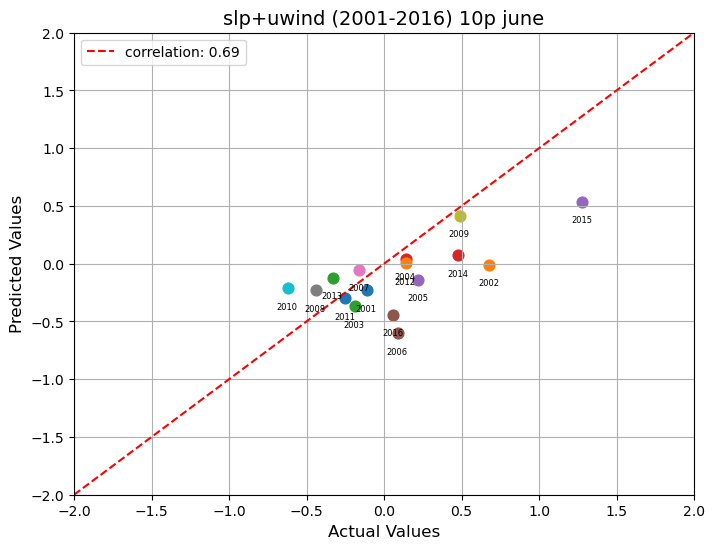

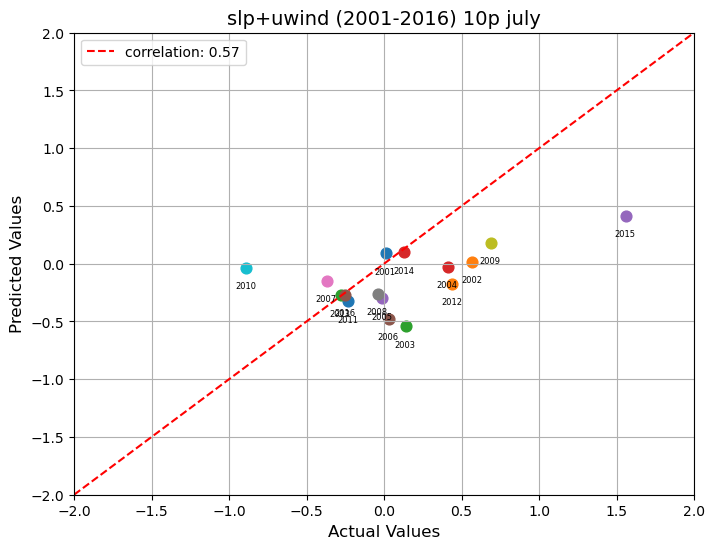

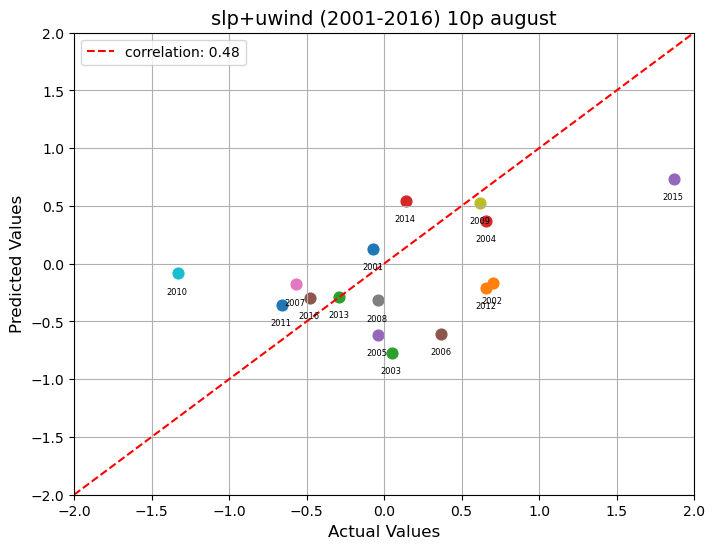

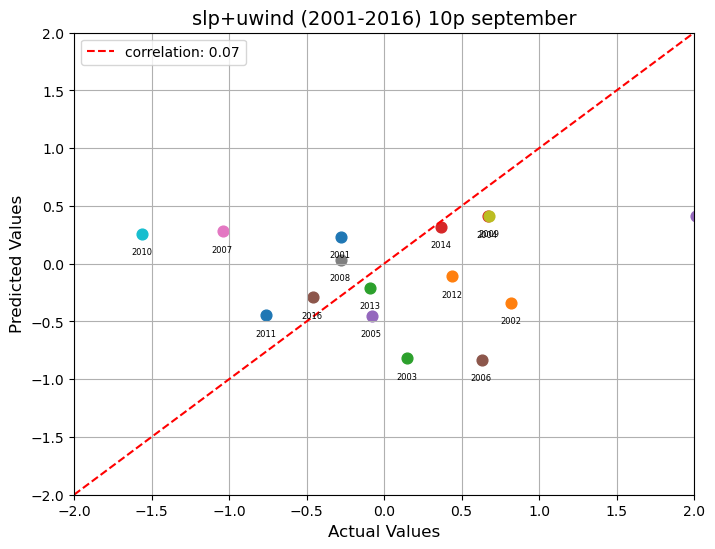

In [26]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=60)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=6)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+uwind (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()
    plt.show